In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import cmocean as cm
import glob
import time

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## annotation:

We visualise (all for 1st day of all 12 months):
    - u velocities 
    - present-day boundary conditions 
    - the old intrusion (present-day - old BC's)
    - the new intrusion (present day - new BC's) - smaller especially at depth 
    (at sigma <25 we have assigned it the number 50 for now)
    - new intrusion - old intrusion (difference between old PI boundary conditions and new ones)

In [3]:
##define areas in m2 of each cell on the boundary:boundary starts at 375

w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
#print(w['e2t'][0,375:470,10])
boundary_ys = w['e2t'][0,375:470,10]
depths = w['gdept_1d'][:]
#print(w['e3t_1d'][0])
area = np.zeros([40,95])
ydir = np.zeros([40,95])
zdir = np.zeros([40,95])
for i in range(0,40):
    zdir[i,:]=w['e3t_1d'][0,i]
for i in range(0,95):
    ydir[:,i]=boundary_ys[i]
    
area = ydir * zdir

w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
mask_bdy = w['umask'][0,:,375:470,10]

In [4]:
## define 12 U velocity files for 12 days throughout the year > get transports
days = ['0101','0201','0301','0401','0501','0601','0701','0801','0901','1001','1101','1201']
#w1 = nc.Dataset(f'/data/tjarniko/results/BASERUN_EXP/PI5/ncs/{tf}')
day1ofmonth_velocities_PI5 = np.zeros([12,40,95])
day1ofmonth_transports_PI5 = np.zeros([12,40,95])
### get 

s = time.time()
for i in range(0,12):
    
    w = f'/data/tjarniko/results/BASERUN_EXP/PI5/ncs/SKOG_1d_*_grid_U_2015*{days[i]}.nc'
    w2 = glob.glob(w)
    tdat = nc.Dataset(w2[0])
    UVEL = tdat['vozocrtx']
    
    UVEL_jdfmouth = UVEL[0,:,375:470,10]
    UTR_M3_s = UVEL_jdfmouth*area
    day1ofmonth_velocities_PI5[i,:,:] = UVEL_jdfmouth
    day1ofmonth_transports_PI5[i,:,:] = UVEL_jdfmouth * area 
    
    day1ofmonth_velocities_PI5[day1ofmonth_velocities_PI5==0] = np.nan
    day1ofmonth_transports_PI5[day1ofmonth_transports_PI5==0] = np.nan

In [5]:
### get preindustrial and present_day boundary conditions
preind_old = np.zeros([12,40,95])
preind_new = np.zeros([12,40,95])
preind_sigma = np.zeros([12,40,95])
present_day = np.zeros([12,40,95])

tm = ['01','02','03','04','05','06','07','08','09','10','11','12']

for i in range(0,12):
    allchanges = nc.Dataset(f'./preind_DIC/old/LO_AOUmethod_stoicCO_diseq_allup_y2015m{tm[i]}d01_preind_DIC.nc')
    preind_new[i,:,:] = (allchanges['preindustrial_DIC']['preind_dic'][:,950-95:950])
    preind_sigma[i,:,:] = (allchanges['preindustrial_DIC']['sigma0'][:,950-95:950])
    
    oldbc = nc.Dataset(f'./PREIND_BCCOND/PREIND_BC_v201905_y2015m{tm[i]}d01.nc')
    preind_old[i,:,:] = (oldbc['DIC'][0,:,0,950-95:950])
    
    presbc = nc.Dataset(f'/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_y2015m{tm[i]}d01.nc')
    present_day[i,:,:] = (presbc['DIC'][0,:,0,950-95:950])

change = 50
preind_new_25cutoff = np.copy(preind_new)
preind_new_25cutoff[preind_sigma<=25] = present_day[preind_sigma<=25]-change

In [6]:
# ti = 4
# print(present_day[ti,:,37]-preind_old[ti,:,37])
# print(present_day[ti,:,37]-preind_new[ti,:,37])

In [7]:
## interpolate T grid onto U grid
preind_old_int = np.zeros([12,40,95])
preind_new_int = np.zeros([12,40,95])
preind_sigma_int = np.zeros([12,40,95])
present_day_int = np.zeros([12,40,95])
preind_new_25cutoff_int = np.zeros([12,40,95])

for i in range(0,94):
    preind_old_int[:,:,i] = (preind_old[:,:,i]+preind_old[:,:,i+1])/2
    preind_new_int[:,:,i] = (preind_new[:,:,i]+preind_new[:,:,i+1])/2
    present_day_int[:,:,i] = (present_day[:,:,i]+present_day[:,:,i+1])/2
    preind_new_25cutoff_int[:,:,i] = (preind_new_25cutoff[:,:,i]+preind_new_25cutoff[:,:,i+1])/2
    
BR_PI_oldbc_increase = present_day_int-preind_old_int
BR_PI_newbc_increase = present_day_int-preind_new_int
BR_PI_newbc_25cutoff_increase = present_day_int-preind_new_25cutoff_int

## Visualise daily averaged u velocity by month (1st day of each month)

(40, 95)
(40, 95)
(40, 95)
(40, 95)


/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


(40, 95)
(40, 95)
(40, 95)
(40, 95)
(40, 95)
(40, 95)
(40, 95)
(40, 95)


Text(0.5, 0.98, 'present day u velocities at the boundary')

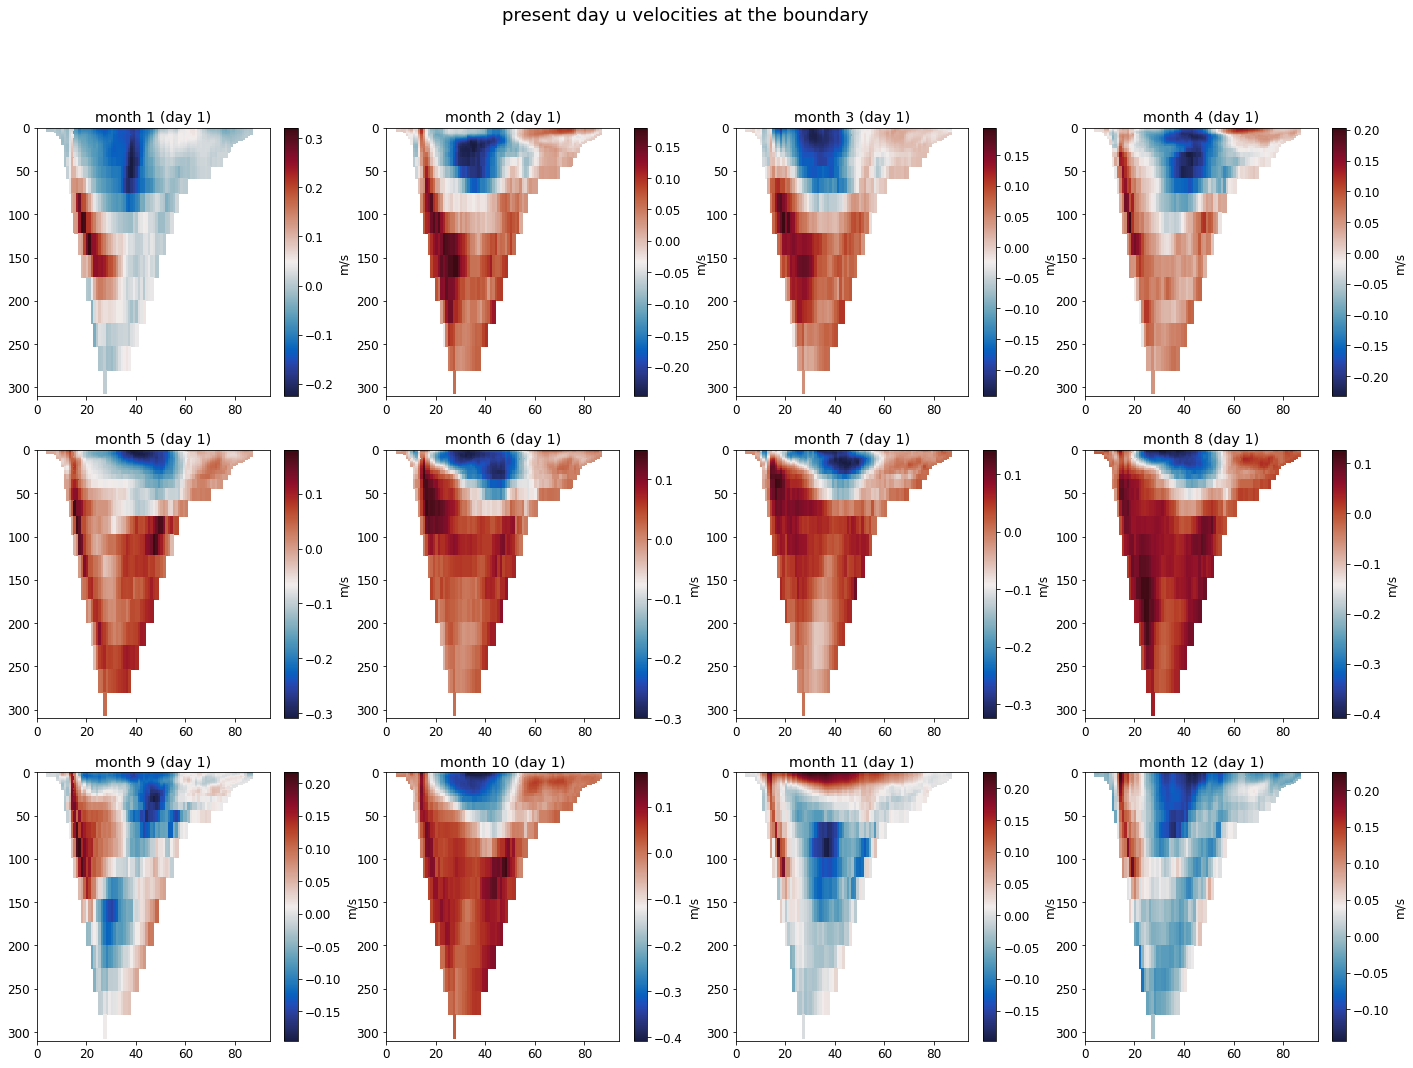

In [8]:
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'bold',
'size'   : 12}

# diff = preind_old_int-preind_new_int
# print(np.nanmean(diff[mask_bdy]))

#plt.pcolormesh(UTR_M3_s)
w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
# print(w['gdept_1d'])

# print(np.shape(UTR_M3_s))
# print(np.shape(ydir[0,:]))
# print(np.shape(depths[0,:]))

fact = 1.2
fig, axs = plt.subplots(3,4, figsize=(20*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,12):
    section_slice = np.arange(0, 95,1)
    axs[i].set_ylim([0,310])
    axs[i].invert_yaxis()
    tplt2 = day1ofmonth_velocities_PI5[i,:,:]*mask_bdy
    
    tplt=np.ma.masked_values(tplt2,0)
    print(np.shape(tplt))
    tcmap = cm.cm.balance
    cmap = tcmap
    mesh = axs[i].pcolormesh(section_slice,depths[0,:],tplt, cmap = cm.cm.balance)
    fig.colorbar(mesh, ax=axs[i], label = 'm/s')
    #mesh = ax.pcolormesh(np.arange(0,4,1),np.arange(0,5,1),np.zeros([5,4]), cmap = tcmap, vmin=-5000, vmax=5000 )
    axs[i].set_title(f'month {i+1} (day 1)')
    

plt.suptitle('present day u velocities at the boundary', fontsize = 18)

### Visualise present-day boundary conditions by month (1st day of each month)

-15.174561517012746
<class 'netCDF4._netCDF4.Variable'>
float64 gdept_1d(t, z)
    _FillValue: nan
    standard_name: gdept_1d
    long_name: nominal depth of T-grid points
    units: m
    positive: down
unlimited dimensions: t
current shape = (1, 40)
filling on
(40, 95)
(95,)
(40,)


/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Text(0.5, 0.98, 'present day boundary conditions (DIC)')

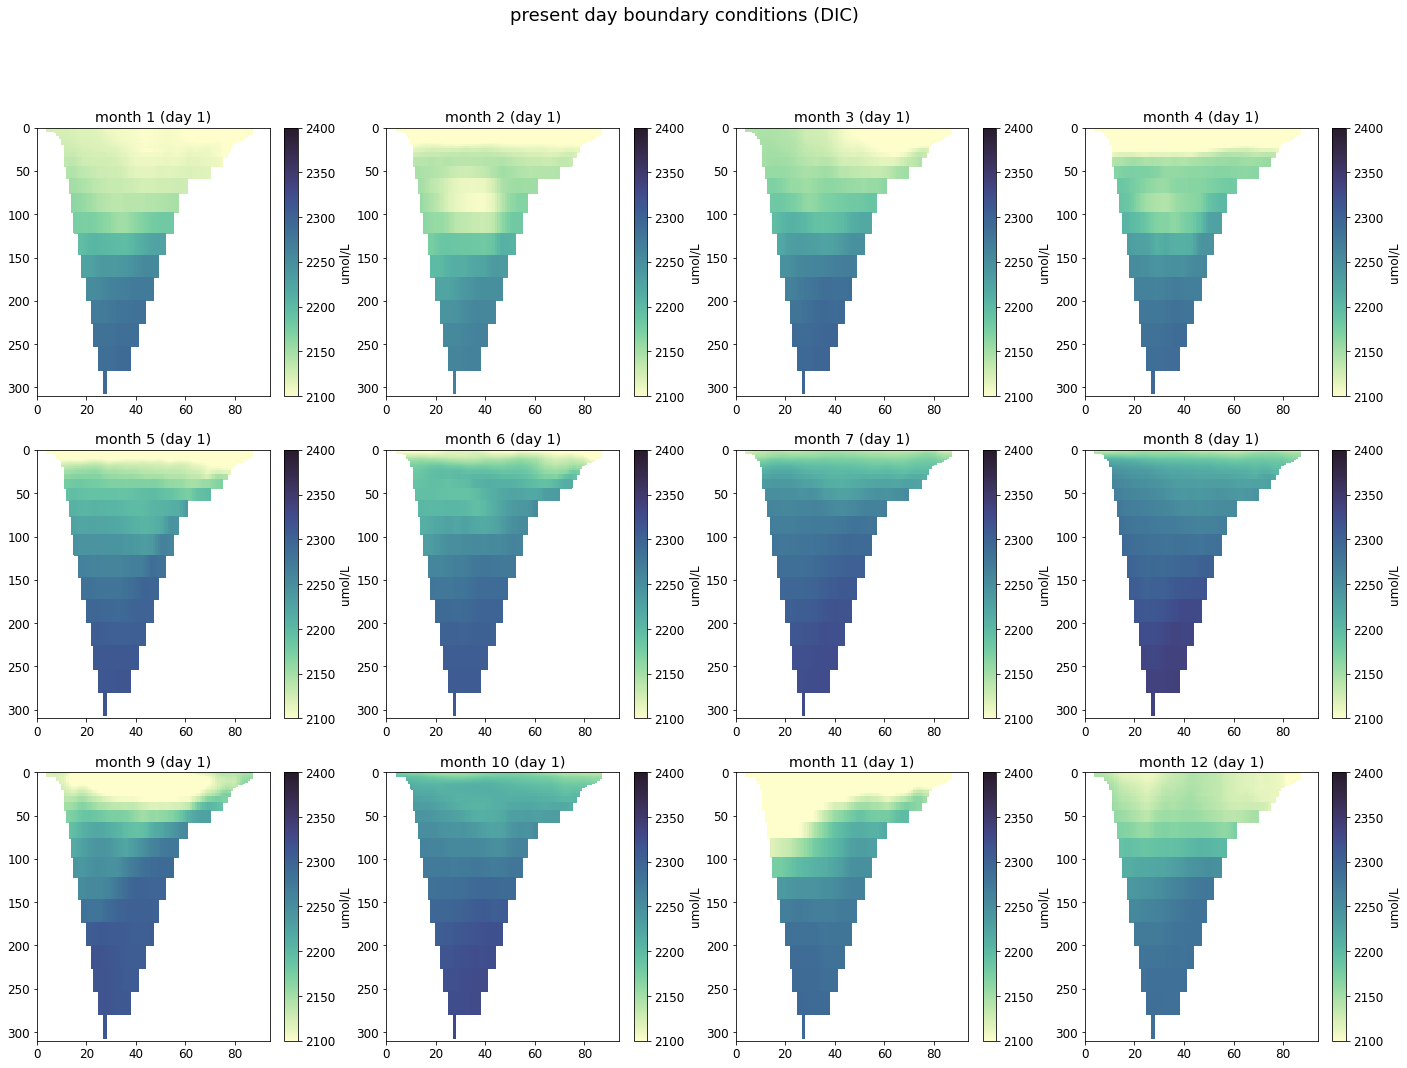

In [40]:
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'bold',
'size'   : 12}

diff = preind_old_int-preind_new_int
print(np.nanmean(diff[mask_bdy]))

#plt.pcolormesh(UTR_M3_s)
w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
print(w['gdept_1d'])

print(np.shape(UTR_M3_s))
print(np.shape(ydir[0,:]))
print(np.shape(depths[0,:]))

fact = 1.2
fig, axs = plt.subplots(3,4, figsize=(20*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,12):
    section_slice = np.arange(0, 95,1)
    axs[i].set_ylim([0,310])
    axs[i].invert_yaxis()
    tplt2 = present_day_int[i,:,:]*mask_bdy
    tplt=np.ma.masked_values(tplt2,0)
    tcmap = cm.cm.balance
    cmap = tcmap
    mesh = axs[i].pcolormesh(section_slice,depths[0,:],tplt, cmap = cm.cm.deep, vmin=2100, vmax=2400 )
    fig.colorbar(mesh, ax=axs[i], label = 'umol/L')
    #mesh = ax.pcolormesh(np.arange(0,4,1),np.arange(0,5,1),np.zeros([5,4]), cmap = tcmap, vmin=-5000, vmax=5000 )
    axs[i].set_title(f'month {i+1} (day 1)')
    

plt.suptitle('present day boundary conditions (DIC)', fontsize = 18)

-15.174561517012746
(40, 95)
(95,)
(40,)


/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Text(0.5, 0.98, 'present day - (OLD PREINDUSTRIAL) \n boundary conditions \n (no update at sigma <=25)')

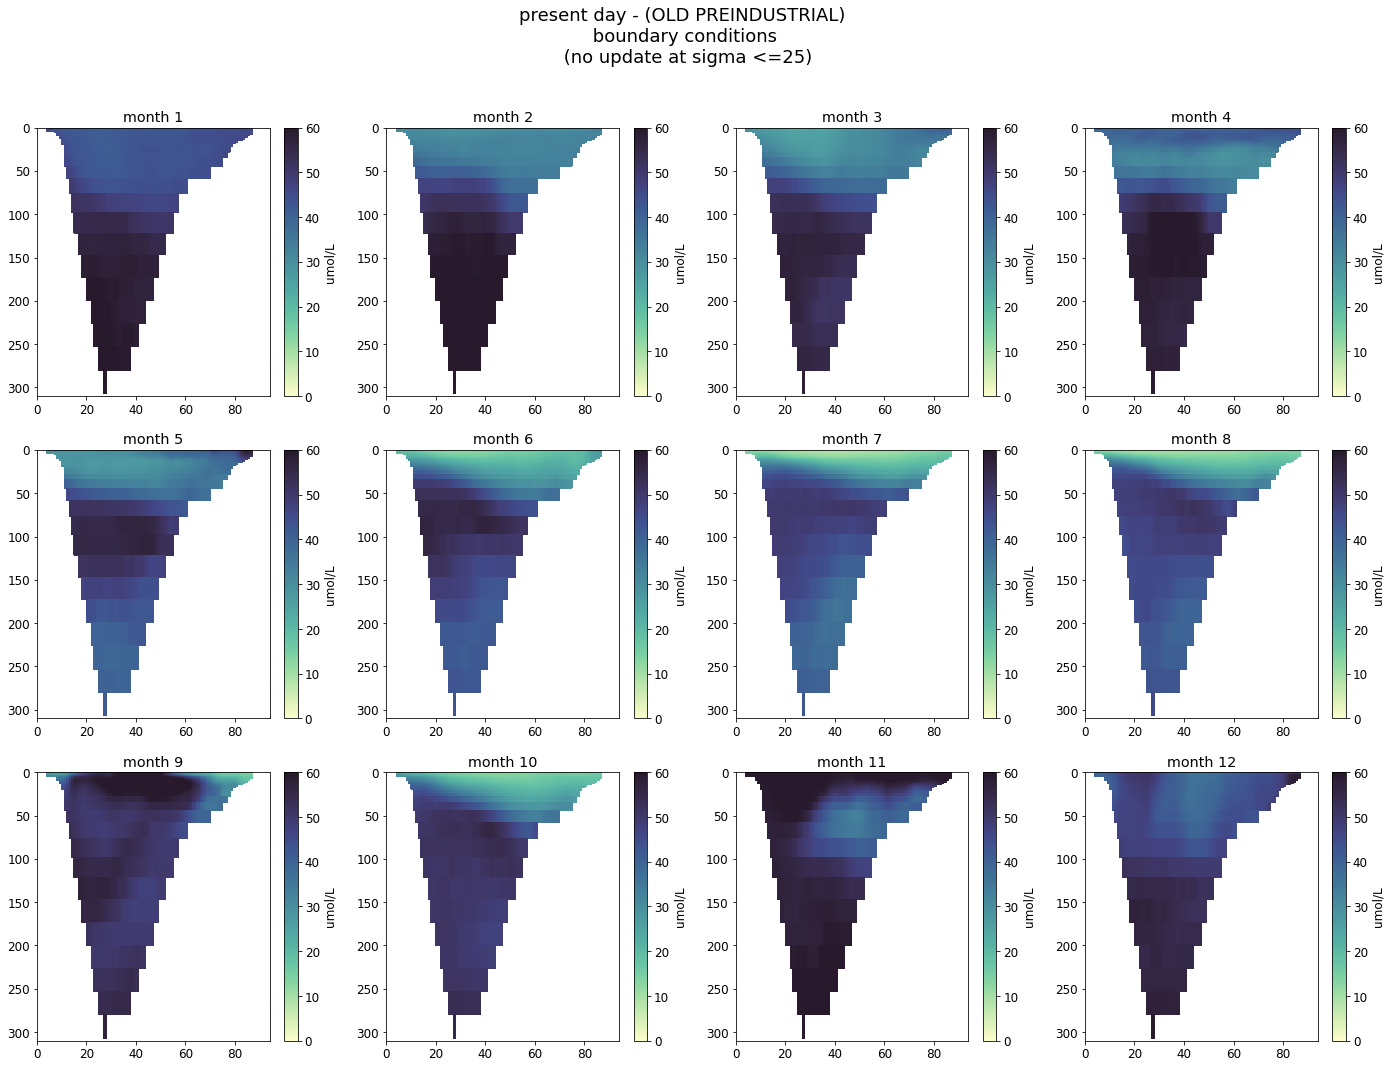

In [41]:
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'bold',
'size'   : 12}

diff = preind_old_int-preind_new_int
print(np.nanmean(diff[mask_bdy]))

#plt.pcolormesh(UTR_M3_s)
depths = w['gdept_1d'][:]
print(np.shape(UTR_M3_s))
print(np.shape(ydir[0,:]))
print(np.shape(depths[0,:]))

fact = 1.2
fig, axs = plt.subplots(3,4, figsize=(20*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,12):
    section_slice = np.arange(0, 95,1)
    axs[i].set_ylim([0,310])
    axs[i].invert_yaxis()
    tplt2 = (present_day_int[i,:,:]-preind_old_int[i,:,:])*mask_bdy
    tplt=np.ma.masked_values(tplt2,0)
    tcmap = cm.cm.balance
    cmap = tcmap
    mesh = axs[i].pcolormesh(section_slice,depths[0,:],tplt, cmap = cm.cm.deep, vmin=0, vmax=60 )
    fig.colorbar(mesh, ax=axs[i], label = 'umol/L')
    #mesh = ax.pcolormesh(np.arange(0,4,1),np.arange(0,5,1),np.zeros([5,4]), cmap = tcmap, vmin=-5000, vmax=5000 )
    axs[i].set_title(f'month {i+1}')
    

plt.suptitle('present day - (OLD PREINDUSTRIAL) \n boundary conditions \n (no update at sigma <=25)', fontsize = 18)

-15.174561517012746
(40, 95)
(95,)
(40,)


/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Text(0.5, 0.98, 'present day - (NEW PREINDUSTRIAL -  but no adjustment to sigma = 25) \n boundary conditions')

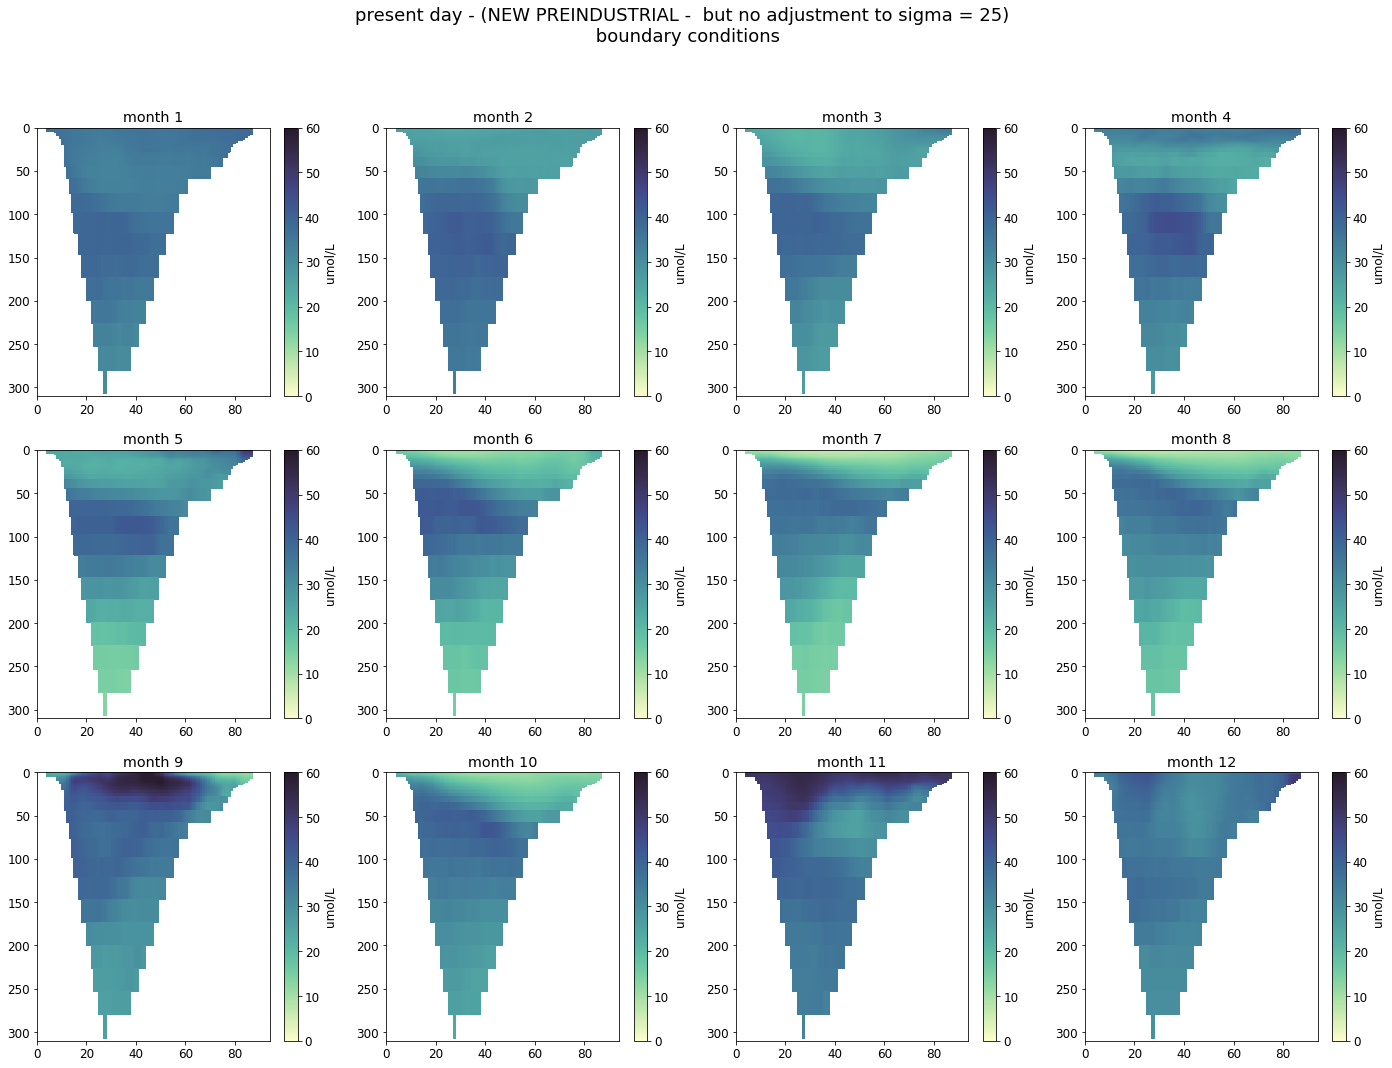

In [42]:
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'bold',
'size'   : 12}

diff = preind_old_int-preind_new_int
print(np.nanmean(diff[mask_bdy]))

#plt.pcolormesh(UTR_M3_s)
depths = w['gdept_1d'][:]
print(np.shape(UTR_M3_s))
print(np.shape(ydir[0,:]))
print(np.shape(depths[0,:]))

fact = 1.2
fig, axs = plt.subplots(3,4, figsize=(20*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,12):
    section_slice = np.arange(0, 95,1)
    axs[i].set_ylim([0,310])
    axs[i].invert_yaxis()
    tplt2 = (present_day_int[i,:,:]-preind_new_int[i,:,:])*mask_bdy
    tplt=np.ma.masked_values(tplt2,0)
    tcmap = cm.cm.balance
    cmap = tcmap
    mesh = axs[i].pcolormesh(section_slice,depths[0,:],tplt, cmap = cm.cm.deep, vmin=0, vmax=60 )
    fig.colorbar(mesh, ax=axs[i], label = 'umol/L')
    #mesh = ax.pcolormesh(np.arange(0,4,1),np.arange(0,5,1),np.zeros([5,4]), cmap = tcmap, vmin=-5000, vmax=5000 )
    axs[i].set_title(f'month {i+1}')
    

plt.suptitle('present day - (NEW PREINDUSTRIAL -  but no adjustment to sigma = 25) \n boundary conditions', fontsize = 18)

-15.174561517012746
(40, 95)
(95,)
(40,)
0
[50.         50.         50.         50.         50.         50.
 50.         50.         50.         50.         50.         50.
 50.         50.         50.         50.         50.         50.
 50.         50.         50.         50.         50.         50.
 50.         50.         38.33902781 39.4606084  38.40938504 35.67242374
 33.33547508 32.35500199 30.71885886  0.          0.          0.
  0.          0.          0.          0.        ]
1
[50.         50.         50.         50.         50.         50.
 50.         50.         50.         50.         50.         50.
 50.         50.         50.         50.         50.         50.
 50.         50.         50.         50.         50.         50.
 50.         50.         41.04569385 41.42351995 39.00680815 37.57212558
 36.04110575 35.64049753 34.92128214  0.          0.          0.
  0.          0.          0.          0.        ]
2
[50.         50.         50.         50.         50.     

/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


7
[50.         50.         50.         50.         50.         50.
 50.         50.         50.         50.         50.         50.
 50.         50.         50.         50.         50.         50.
 50.         50.         50.         38.7362218  33.07518995 38.99313234
 38.76932858 35.93469184 32.62044034 29.70805904 24.82439945 20.44430479
 18.61079705 17.46319807 16.98595663  0.          0.          0.
  0.          0.          0.          0.        ]
8
[50.         50.         50.         50.         50.         50.
 50.         50.         50.         50.         50.         50.
 50.         50.         50.         50.         50.         50.
 50.         50.         50.         50.         50.         50.
 39.57114137 40.32587086 37.79403496 34.04551998 30.40714078 29.19373968
 28.21286251 28.11975579 26.39492205  0.          0.          0.
  0.          0.          0.          0.        ]
9
[50.         50.         50.         50.         50.         50.
 50.         50.         

Text(0.5, 0.98, 'present day DIC BC - (NEW PREINDUSTRIAL BC) \\ where change at sigma <25 = 50')

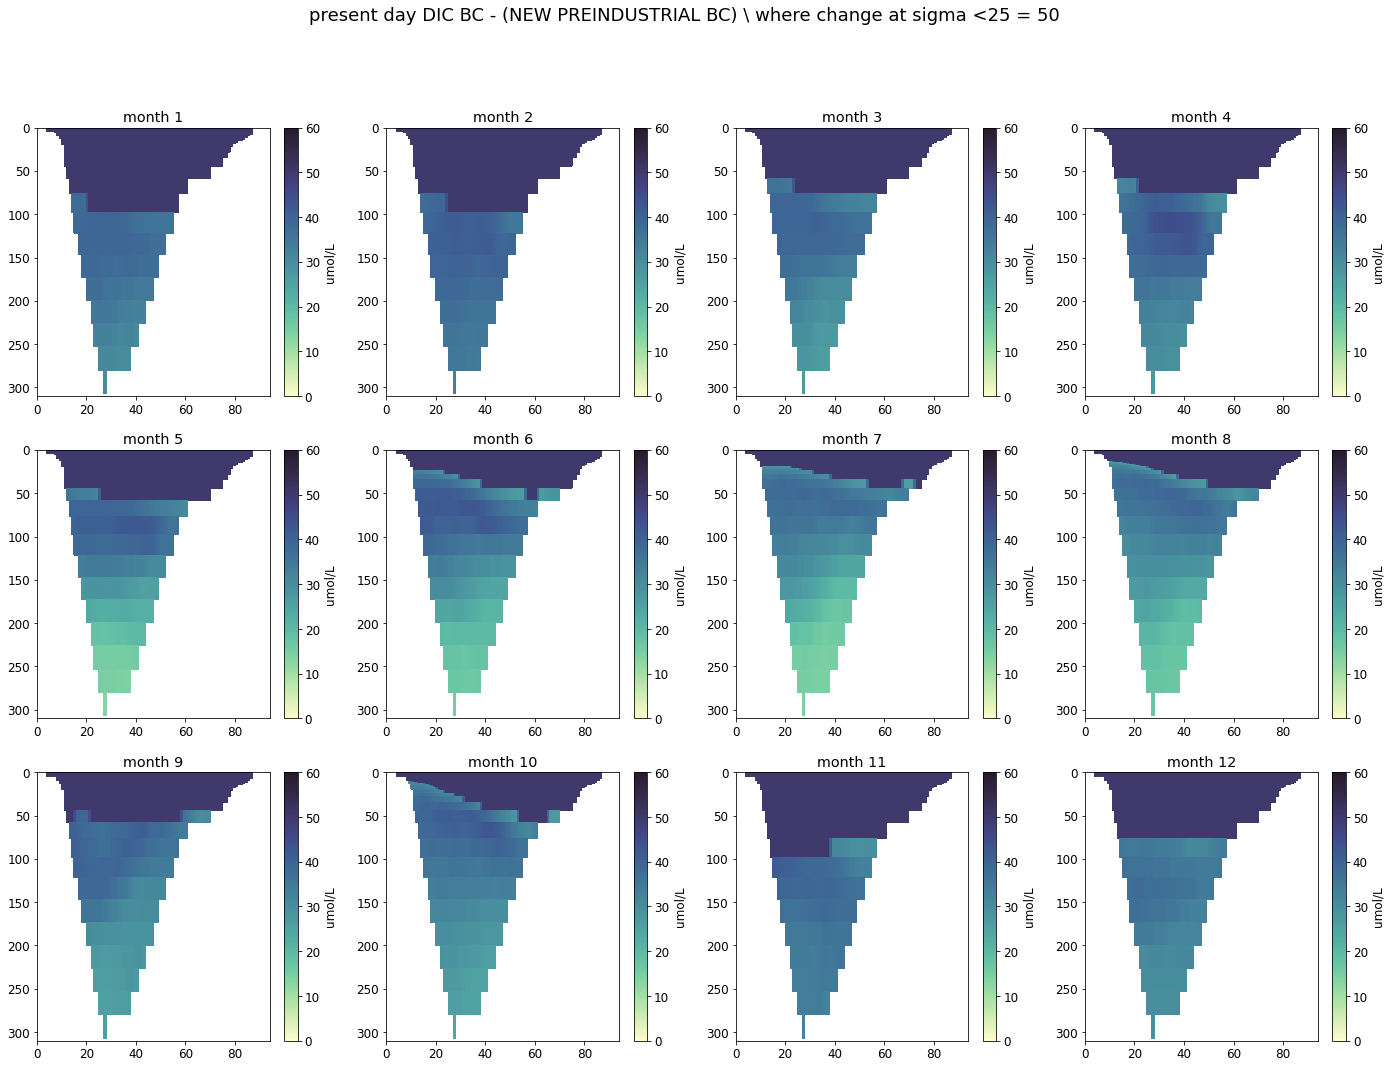

In [43]:
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'bold',
'size'   : 12}

diff = preind_old_int-preind_new_int
print(np.nanmean(diff[mask_bdy]))

#plt.pcolormesh(UTR_M3_s)
depths = w['gdept_1d'][:]
print(np.shape(UTR_M3_s))
print(np.shape(ydir[0,:]))
print(np.shape(depths[0,:]))

fact = 1.2
fig, axs = plt.subplots(3,4, figsize=(20*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,12):
    section_slice = np.arange(0, 95,1)
    axs[i].set_ylim([0,310])
    axs[i].invert_yaxis()
    tplt2 = (present_day_int[i,:,:]-preind_new_25cutoff_int[i,:,:])*mask_bdy
    print(i)
    print(tplt2[:,37])
    tplt=np.ma.masked_values(tplt2,0)
    tcmap = cm.cm.balance
    cmap = tcmap
    mesh = axs[i].pcolormesh(section_slice,depths[0,:],tplt, cmap = cm.cm.deep, vmin=0, vmax=60 )
    fig.colorbar(mesh, ax=axs[i], label = 'umol/L')
    #mesh = ax.pcolormesh(np.arange(0,4,1),np.arange(0,5,1),np.zeros([5,4]), cmap = tcmap, vmin=-5000, vmax=5000 )
    axs[i].set_title(f'month {i+1}')
    

plt.suptitle('present day DIC BC - (NEW PREINDUSTRIAL BC) \ where change at sigma <25 = 50', fontsize = 18)

-3.1382422256586495


/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Text(0.5, 0.98, 'difference between old preindustrial BCs and new preindustrial BCs (units umol/L) \n (where red, new PI have LESS DIC (i.e. bigger intrusion ))')

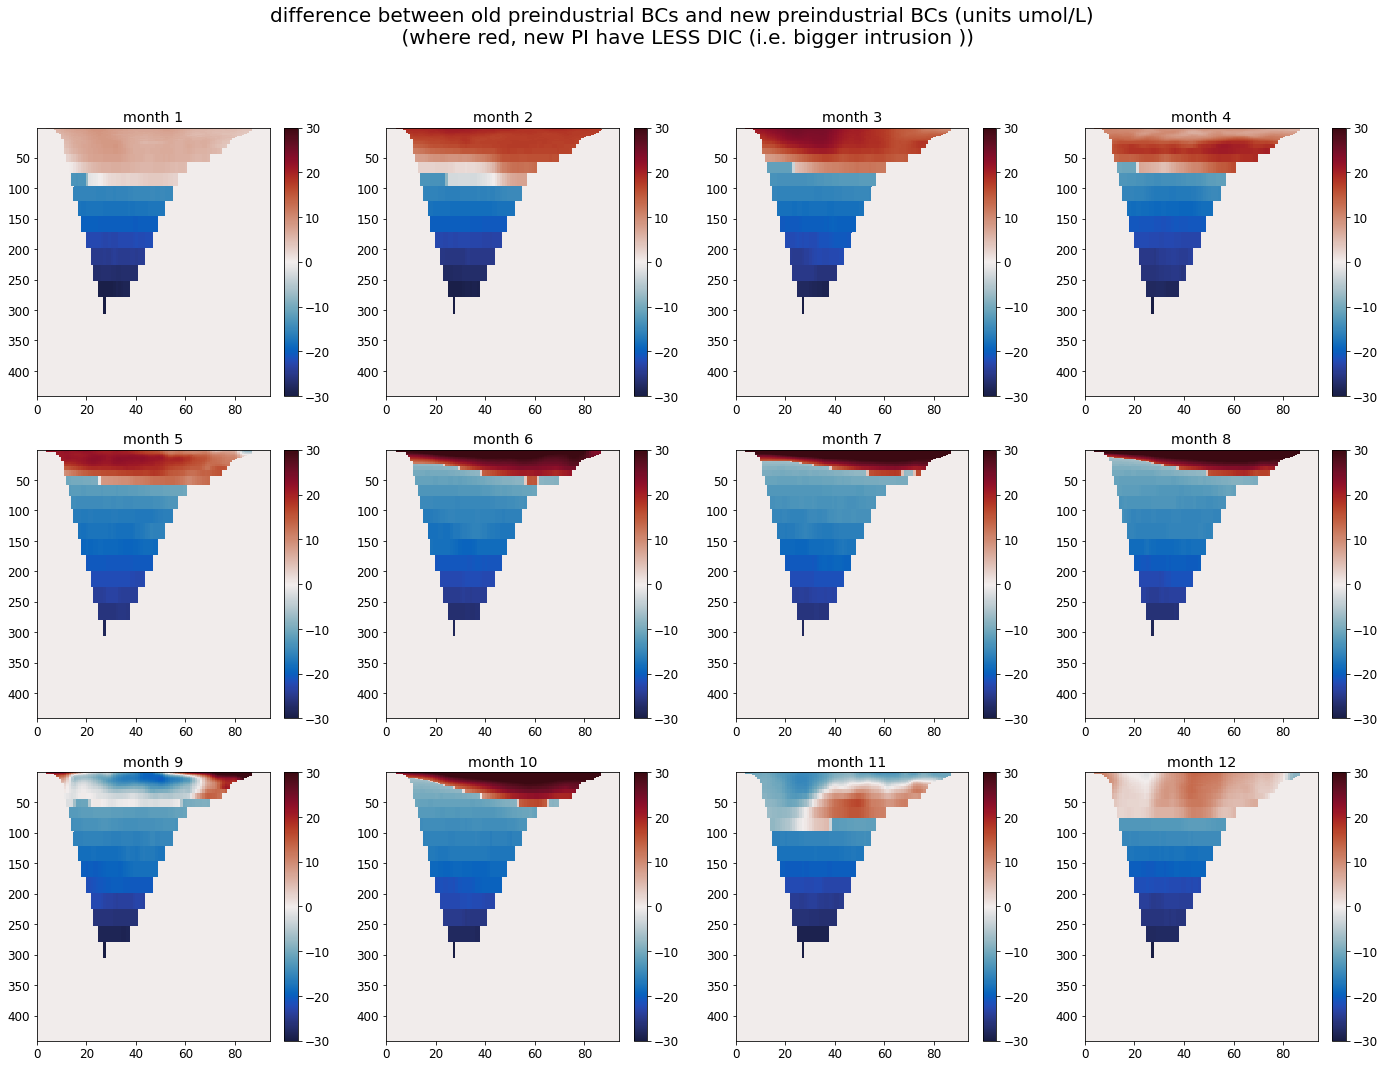

In [44]:
diff = preind_old_int-preind_new_25cutoff_int
print(np.nanmean(diff[mask_bdy]))

#plt.pcolormesh(UTR_M3_s)
depths = w['gdept_1d'][:]
# print(np.shape(UTR_M3_s))
# print(np.shape(ydir[0,:]))
# print(np.shape(depths[0,:]))

fact = 1.2
fig, axs = plt.subplots(3,4, figsize=(20*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,12):
    section_slice = np.arange(0, 95,1)
    axs[i].invert_yaxis()
    tplt = diff[i,:,:]*mask_bdy
    tcmap = cm.cm.balance
    cmap = tcmap
    mesh = axs[i].pcolormesh(section_slice,depths[0,:],tplt, cmap = tcmap, vmin=-30, vmax=30 )
    fig.colorbar(mesh, ax=axs[i])
    #mesh = ax.pcolormesh(np.arange(0,4,1),np.arange(0,5,1),np.zeros([5,4]), cmap = tcmap, vmin=-5000, vmax=5000 )
    axs[i].set_title(f'month {i+1}')
    
fig.suptitle('difference between old preindustrial BCs and new preindustrial BCs (units umol/L) \n (where red, new PI have LESS DIC (i.e. bigger intrusion ))', fontsize = 20)



In [45]:
# tind = 10
# for i in range(0,12):
# #     print(np.nanmean(preind_new_25cutoff_int[i,tind,:])-
# #     np.nanmean(preind_old_int[i,tind,:]))
#     print(np.nanmean(diff[i,tind,:]))
#     print()

Text(0.5, 0.98, 'by-depth averages (all 12 test days together)')

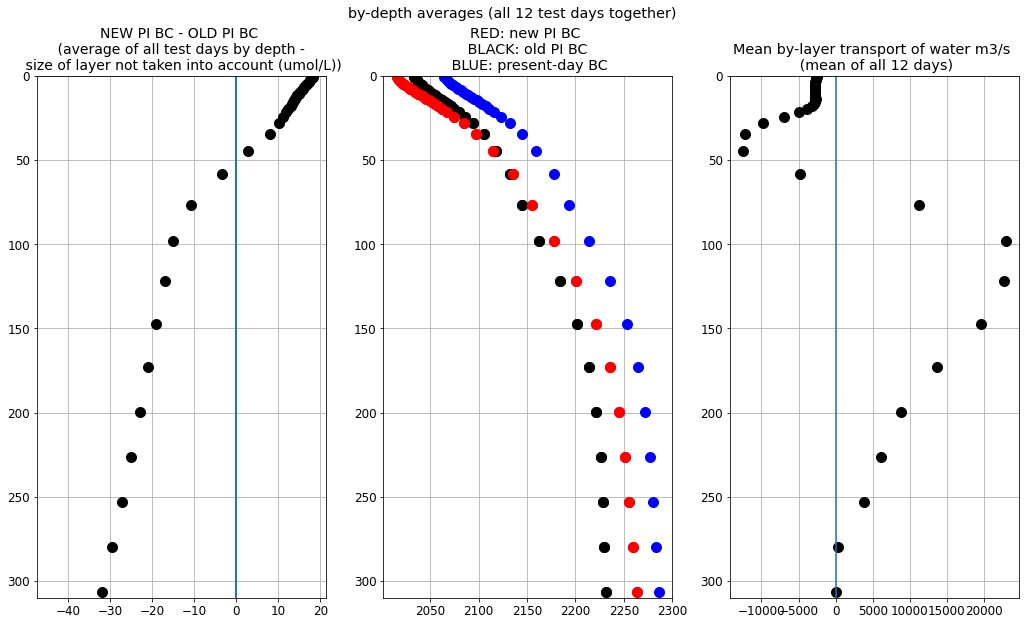

In [46]:

fact = 0.8
fig, [ax3, ax4, ax5] = plt.subplots(1,3, figsize=(22*fact, 12*fact), facecolor='w', edgecolor='k')\

for i in range(0,40):
    ax3.plot(np.nanmean(diff[:,i,:]),depths[0,i], marker = 'o', \
             linestyle = '', linewidth = 4, color = 'k',\
             markersize = 10, label = 'domain-wide \n mean')
    ax3.set_ylim([0,310])
    ax3.axvline(x=0)
ax3.grid()

for i in range(0,40):
    ax4.plot(np.nanmean(preind_old_int[:,i,:]),depths[0,i], marker = 'o', \
             linestyle = '', linewidth = 4, color = 'k',\
             markersize = 10, label = 'OLD BC')
    ax4.plot(np.nanmean(preind_new_25cutoff_int[:,i,:]),depths[0,i], marker = 'o', \
             linestyle = '', linewidth = 4, color = 'r',\
             markersize = 10, label = 'NEW BC')
    ax4.set_ylim([0,310])
ax4.grid()
ax4.set_title('Both old and new BC - (red are new) (umol/L)')


#transports in m3/s 
for i in range(0,40):
    ax4.plot(np.nanmean(present_day_int[:,i,:]),depths[0,i], marker = 'o', \
         linestyle = '', linewidth = 4, color = 'b',\
         markersize = 10, label = 'OLD BC')
    ax4.plot(np.nanmean(preind_old_int[:,i,:]),depths[0,i], marker = 'o', \
             linestyle = '', linewidth = 4, color = 'k',\
             markersize = 10, label = 'OLD BC')
    ax4.plot(np.nanmean(preind_new_25cutoff_int[:,i,:]),depths[0,i], marker = 'o', \
             linestyle = '', linewidth = 4, color = 'r',\
             markersize = 10, label = 'NEW BC')
    ax4.set_ylim([0,310])
ax4.grid()
ax4.set_title('RED: new PI BC \n BLACK: old PI BC \n BLUE: present-day BC')

for i in range(0,40):
    ax5.plot(np.nansum(day1ofmonth_transports_PI5[:,i,:])/12,depths[0,i], marker = 'o', \
             linestyle = '', linewidth = 4, color = 'k',\
             markersize = 10, label = 'layer transport')
    ax5.set_ylim([0,310])
ax5.set_title('Mean by-layer transport of water m3/s \n (mean of all 12 days)')
ax5.axvline(x=0)

ax3.set_title('NEW PI BC - OLD PI BC \n (average of all test days by depth - \n size of layer not taken into account (umol/L))', fontsize = 14)
ax3.invert_yaxis()
ax4.invert_yaxis()
ax5.invert_yaxis()
ax4.grid()
ax5.grid()

plt.suptitle('by-depth averages (all 12 test days together)')

[F] No I've never done this.  If you want to do it at grid point 10 that is your last 95 points of 950 of each boundary file. The start point and end point of the boundary is in the namelist file (remember these are fortran coordinates not python -- off by 1).  Boundary files are daily so you can use daily averaged u-velocity.

    nbdyind   = 2     ! i-index for segment
    nbdybeg   = 376   ! j-index for segment beginning
    nbdyend   = 470   ! j-index for segment end
    
    376

In [47]:
w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = w['gdept_1d'][0,:]
print(depths)


presday_feb = nc.Dataset(f'/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_y2015m02d01.nc')
presday_feb_DIC = (presday_feb['DIC'][0,:,0,950-95:950])
presday_feb_TA = (presday_feb['TA'][0,:,0,950-95:950])
presday_feb_sal = (presday_feb['vosaline'][0,:,0,950-95:950])
presday_feb_NO3 = (presday_feb['NO3'][0,:,0,950-95:950])
presday_feb_Si = (presday_feb['Si'][0,:,0,950-95:950])
########################
changes_feb = nc.Dataset(f'./preind_DIC/old/LO_AOUmethod_stoicCO_diseq_allup_y2015m02d01_preind_DIC.nc')
preind_feb_DIC = changes_feb['preindustrial_DIC']['preind_dic'][:,950-95:950]
preind_feb_sigma0 = changes_feb['preindustrial_DIC']['sigma0'][:,950-95:950]
preind_feb_pycnal_age = 2015  - changes_feb['preindustrial_DIC']['pycnal_last_at_surface'][:,950-95:950]

preind_feb_DIC_sigadj = np.copy(preind_feb_DIC)
z = np.where(preind_feb_sigma0<=25)
preind_feb_DIC_sigadj[z] = presday_feb_DIC[z]-50

################

changesold_feb = nc.Dataset(f'./PREIND_BCCOND/PREIND_BC_v201905_y2015m02d01.nc')
preindold_feb_DIC = changesold_feb['DIC'][0,:,0,950-95:950]

# #########

presday_jul = nc.Dataset(f'/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_y2015m07d01.nc')
presday_jul_DIC = (presday_jul['DIC'][0,:,0,950-95:950])
presday_jul_TA = (presday_jul['TA'][0,:,0,950-95:950])
presday_jul_sal = (presday_jul['vosaline'][0,:,0,950-95:950])

########################
changes_jul = nc.Dataset(f'./preind_DIC/old/LO_AOUmethod_stoicCO_diseq_allup_y2015m07d01_preind_DIC.nc')
preind_jul_DIC = changes_jul['preindustrial_DIC']['preind_dic'][:,950-95:950]
preind_jul_sigma0 = changes_jul['preindustrial_DIC']['sigma0'][:,950-95:950]
preind_jul_pycnal_age = 2015  - changes_jul['preindustrial_DIC']['pycnal_last_at_surface'][:,950-95:950]
presday_jul_NO3 = (presday_jul['NO3'][0,:,0,950-95:950])
presday_jul_Si = (presday_jul['Si'][0,:,0,950-95:950])

preind_jul_DIC_sigadj = np.copy(preind_jul_DIC)
z = np.where(preind_jul_sigma0<=25)
preind_jul_DIC_sigadj[z] = presday_jul_DIC[z]-50

################

changesold_jul = nc.Dataset(f'./PREIND_BCCOND/PREIND_BC_v201905_y2015m07d01.nc')
preindold_jul_DIC = changesold_jul['DIC'][0,:,0,950-95:950]

[  0.50000027   1.50000314   2.5000115    3.50003055   4.50007042
   5.50015083   6.50031022   7.50062342   8.50123623   9.50243254
  10.5047653   11.50931127  12.51816684  13.53541212  14.56898216
  15.63428737  16.76117342  18.00713456  19.48178514  21.38997868
  24.10025665  28.22991514  34.68575798  44.51772486  58.48433368
  76.58558445  98.06295924 121.8665184  147.08945807 173.11448217
 199.57304923 226.26030574 253.06663733 279.93454976 306.83419736
 333.75016973 360.6745318  387.60320347 414.53408835 441.46610968]


In [48]:
presday_feb

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    acknowledgements: Live Ocean http://faculty.washington.edu/pmacc/LO/LiveOcean.html
    creator_email: sallen@eoas.ubc.ca
    creator_name: Salish Sea MEOPAR Project Contributors
    creator_url: https://salishsea-meopar-docs.readthedocs.org/
    institution: UBC EOAS
    institution_fullname: Earth, Ocean & Atmospheric Sciences, University of British Columbia
    summary: Temperature, Salinity, Nitrate, Oxygen, DIC and TALKfrom the Live Ocean model interpolated in space onto the Salish Sea NEMO Model western open boundary. Silicon from Nitrate.
    source: http://nbviewer.jupyter.org/urls/bitbucket.org/salishsea/.../LiveOceanNew
    history: [2019-06-07] File creation.
    dimensions(sizes): time_counter(1), deptht(40), yb(1), xbT(950)
    variables(dimensions): int64 time_counter(time_counter), float64 deptht(deptht), int64 yb(yb), int64 xbT(xbT), float64 vosaline(time_counter,deptht,yb,xbT), flo

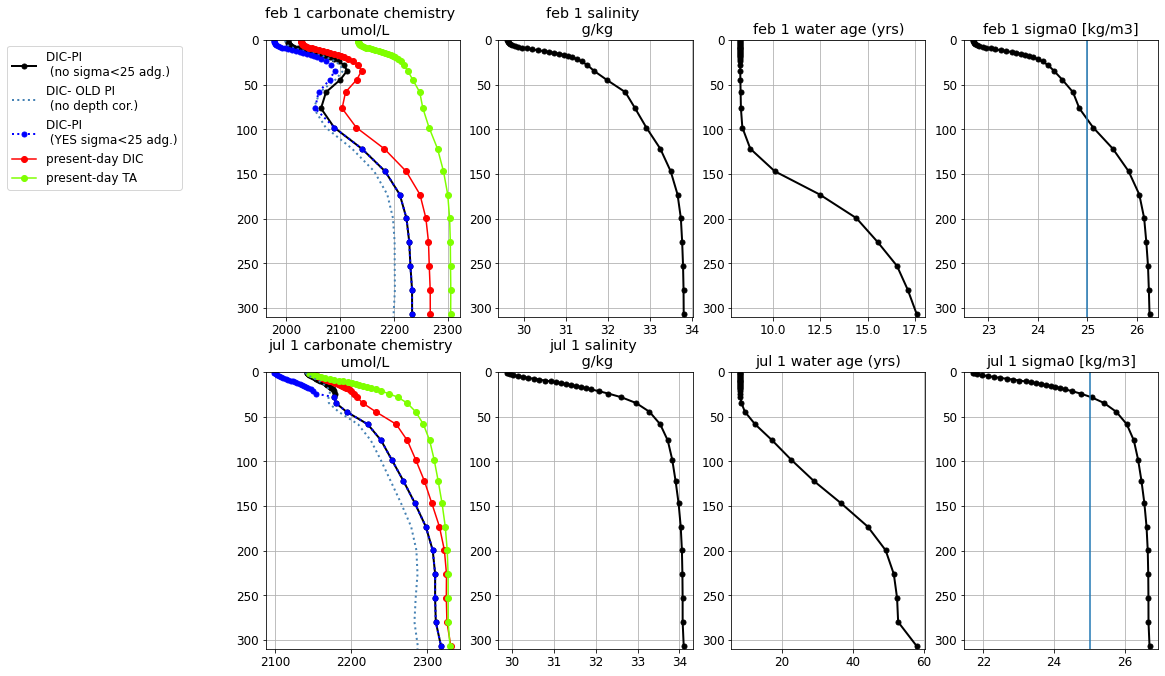

In [49]:


# fig, axs = plt.subplots(1,3, figsize=(22*fact, 12*fact), facecolor='w', edgecolor='k')\

## plotting
fig, axs = plt.subplots(2,4, figsize=(20*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

q = axs[0].plot(preind_feb_DIC[:,37],depths, marker = 'o', \
         linestyle = '-', linewidth = 2, color = 'k',\
         markersize = 5, label = 'DIC-PI \n (no sigma<25 adg.)')
q = axs[0].plot(preindold_feb_DIC[:,37],depths, \
         linestyle = ':', linewidth = 2, color = 'steelblue',\
         markersize = 5, label = 'DIC- OLD PI \n (no depth cor.)')

q = axs[0].plot(preind_feb_DIC_sigadj[:,37],depths, marker = 'o', \
         linestyle = ':', linewidth = 2, color = 'b',\
         markersize = 5, label = 'DIC-PI \n (YES sigma<25 adg.)')
q = axs[0].plot(presday_feb_DIC[:,37],depths, \
                label = 'present-day DIC', marker = 'o', linestyle = '-', color = 'r')
q = axs[0].plot(presday_feb_TA[:,37],depths, \
                label = 'present-day TA', marker = 'o', linestyle = '-', color = 'chartreuse')


q = axs[1].plot(presday_feb_sal[:,37], depths, marker = 'o', \
         linestyle = '-', linewidth = 2, color = 'k',\
         markersize = 5, label = 'salinity g/kg')
q = axs[2].plot(preind_feb_pycnal_age[:,37], depths, marker = 'o', \
         linestyle = '-', linewidth = 2, color = 'k',\
         markersize = 5, label = 'salinity g/kg')
q = axs[3].plot(preind_feb_sigma0[:,37], depths, marker = 'o', \
         linestyle = '-', linewidth = 2, color = 'k',\
         markersize = 5, label = 'kg/m^3')


q = axs[4].plot(preind_jul_DIC[:,37],depths, marker = 'o', \
         linestyle = '-', linewidth = 2, color = 'k',\
         markersize = 5, label = 'DIC-PI \n (no sigma<25 adg.)')
q = axs[4].plot(preind_jul_DIC_sigadj[:,37],depths, marker = 'o', \
         linestyle = ':', linewidth = 2, color = 'b',\
         markersize = 5, label = 'DIC-PI \n (YES sigma<25 adg.)')
q = axs[4].plot(presday_jul_DIC[:,37],depths, \
                label = 'present-day DIC', marker = 'o', linestyle = '-', color = 'r')
q = axs[4].plot(presday_jul_TA[:,37],depths, \
                label = 'present-day TA', marker = 'o', linestyle = '-', color = 'chartreuse')
q = axs[4].plot(preindold_jul_DIC[:,37],depths, \
         linestyle = ':', linewidth = 2, color = 'steelblue',\
         markersize = 5, label = 'DIC- OLD PI \n (no depth cor.)')

q = axs[5].plot(presday_jul_sal[:,37], depths, marker = 'o', \
         linestyle = '-', linewidth = 2, color = 'k',\
         markersize = 5, label = 'salinity g/kg')
q = axs[6].plot(preind_jul_pycnal_age[:,37], depths, marker = 'o', \
         linestyle = '-', linewidth = 2, color = 'k',\
         markersize = 5, label = 'salinity g/kg')
q = axs[7].plot(preind_jul_sigma0[:,37], depths, marker = 'o', \
         linestyle = '-', linewidth = 2, color = 'k',\
         markersize = 5, label = 'kg/m^3')

for i in range(0,8):
    axs[i].grid();
    axs[i].set_ylim([0,310])
    axs[i].invert_yaxis()

axs[0].legend(bbox_to_anchor = [-0.4, 1])
axs[0].set_title('feb 1 carbonate chemistry \n umol/L')
axs[4].set_title('jul 1 carbonate chemistry \n umol/L')
axs[1].set_title('feb 1 salinity \n g/kg')
axs[5].set_title('jul 1 salinity \n g/kg')
axs[2].set_title('feb 1 water age (yrs)')
axs[6].set_title('jul 1 water age (yrs)')
axs[3].set_title('feb 1 sigma0 [kg/m3]')
axs[7].set_title('jul 1 sigma0 [kg/m3]')

axs[3].axvline(x=25)
axs[7].axvline(x=25)

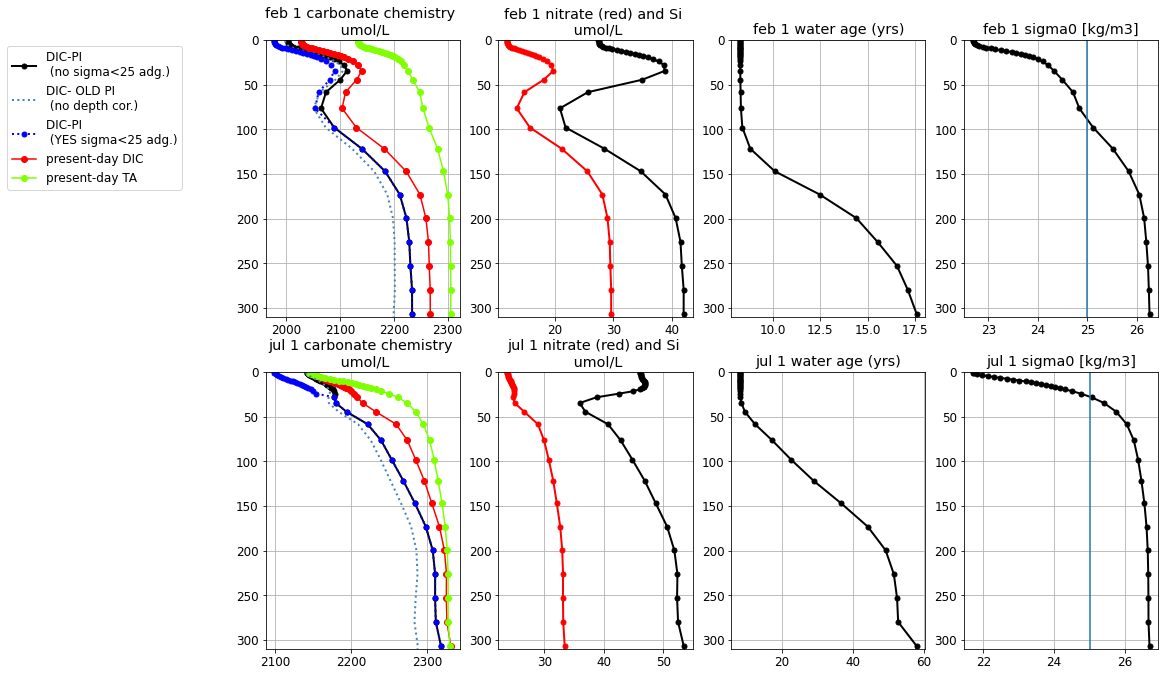

In [50]:


# fig, axs = plt.subplots(1,3, figsize=(22*fact, 12*fact), facecolor='w', edgecolor='k')\

## plotting
fig, axs = plt.subplots(2,4, figsize=(20*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

q = axs[0].plot(preind_feb_DIC[:,37],depths, marker = 'o', \
         linestyle = '-', linewidth = 2, color = 'k',\
         markersize = 5, label = 'DIC-PI \n (no sigma<25 adg.)')
q = axs[0].plot(preindold_feb_DIC[:,37],depths, \
         linestyle = ':', linewidth = 2, color = 'steelblue',\
         markersize = 5, label = 'DIC- OLD PI \n (no depth cor.)')

q = axs[0].plot(preind_feb_DIC_sigadj[:,37],depths, marker = 'o', \
         linestyle = ':', linewidth = 2, color = 'b',\
         markersize = 5, label = 'DIC-PI \n (YES sigma<25 adg.)')
q = axs[0].plot(presday_feb_DIC[:,37],depths, \
                label = 'present-day DIC', marker = 'o', linestyle = '-', color = 'r')
q = axs[0].plot(presday_feb_TA[:,37],depths, \
                label = 'present-day TA', marker = 'o', linestyle = '-', color = 'chartreuse')


q = axs[1].plot(presday_feb_NO3[:,37], depths, marker = 'o', \
         linestyle = '-', linewidth = 2, color = 'r',\
         markersize = 5, label = 'NO3 uM')
q = axs[1].plot(presday_feb_Si[:,37], depths, marker = 'o', \
         linestyle = '-', linewidth = 2, color = 'k',\
         markersize = 5, label = 'Si uM')

q = axs[2].plot(preind_feb_pycnal_age[:,37], depths, marker = 'o', \
         linestyle = '-', linewidth = 2, color = 'k',\
         markersize = 5, label = 'salinity g/kg')
q = axs[3].plot(preind_feb_sigma0[:,37], depths, marker = 'o', \
         linestyle = '-', linewidth = 2, color = 'k',\
         markersize = 5, label = 'kg/m^3')


q = axs[4].plot(preind_jul_DIC[:,37],depths, marker = 'o', \
         linestyle = '-', linewidth = 2, color = 'k',\
         markersize = 5, label = 'DIC-PI \n (no sigma<25 adg.)')
q = axs[4].plot(preind_jul_DIC_sigadj[:,37],depths, marker = 'o', \
         linestyle = ':', linewidth = 2, color = 'b',\
         markersize = 5, label = 'DIC-PI \n (YES sigma<25 adg.)')
q = axs[4].plot(presday_jul_DIC[:,37],depths, \
                label = 'present-day DIC', marker = 'o', linestyle = '-', color = 'r')
q = axs[4].plot(presday_jul_TA[:,37],depths, \
                label = 'present-day TA', marker = 'o', linestyle = '-', color = 'chartreuse')
q = axs[4].plot(preindold_jul_DIC[:,37],depths, \
         linestyle = ':', linewidth = 2, color = 'steelblue',\
         markersize = 5, label = 'DIC- OLD PI \n (no depth cor.)')

q = axs[5].plot(presday_jul_NO3[:,37], depths, marker = 'o', \
         linestyle = '-', linewidth = 2, color = 'r',\
         markersize = 5, label = 'NO3 uM')
q = axs[5].plot(presday_jul_Si[:,37], depths, marker = 'o', \
         linestyle = '-', linewidth = 2, color = 'k',\
         markersize = 5, label = 'Si uM')

q = axs[6].plot(preind_jul_pycnal_age[:,37], depths, marker = 'o', \
         linestyle = '-', linewidth = 2, color = 'k',\
         markersize = 5, label = 'salinity g/kg')
q = axs[7].plot(preind_jul_sigma0[:,37], depths, marker = 'o', \
         linestyle = '-', linewidth = 2, color = 'k',\
         markersize = 5, label = 'kg/m^3')

for i in range(0,8):
    axs[i].grid();
    axs[i].set_ylim([0,310])
    axs[i].invert_yaxis()

axs[0].legend(bbox_to_anchor = [-0.4, 1])
axs[0].set_title('feb 1 carbonate chemistry \n umol/L')
axs[4].set_title('jul 1 carbonate chemistry \n umol/L')
axs[1].set_title('feb 1 nitrate (red) and Si \n umol/L')
axs[5].set_title('jul 1 nitrate (red) and Si \n umol/L')
axs[2].set_title('feb 1 water age (yrs)')
axs[6].set_title('jul 1 water age (yrs)')
axs[3].set_title('feb 1 sigma0 [kg/m3]')
axs[7].set_title('jul 1 sigma0 [kg/m3]')

axs[3].axvline(x=25)
axs[7].axvline(x=25)

In [51]:
presday_feb['NO3']

<class 'netCDF4._netCDF4.Variable'>
float64 NO3(time_counter, deptht, yb, xbT)
    _FillValue: nan
    grid: SalishSea2
    long_name: Nitrate
    units: muM
unlimited dimensions: time_counter
current shape = (1, 40, 1, 950)
filling on

/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


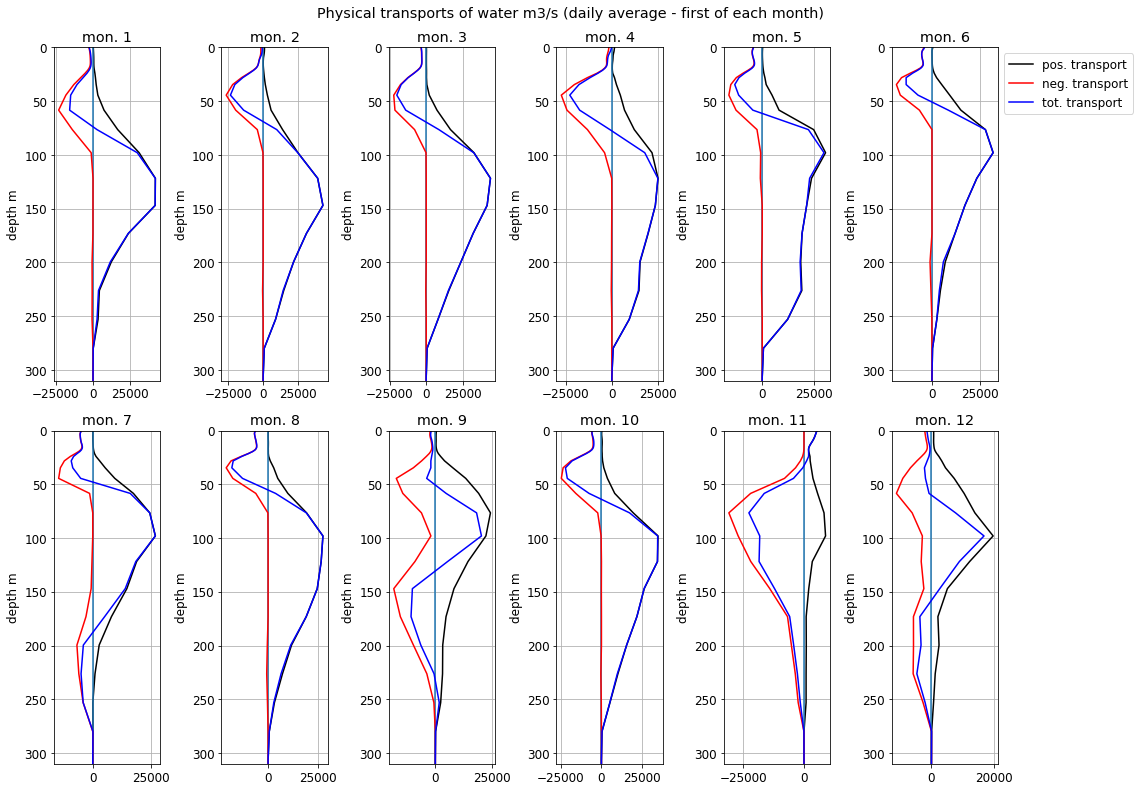

In [52]:
pos_transports_pi5 = np.copy(day1ofmonth_transports_PI5)
pos_transports_pi5[pos_transports_pi5<0] = 0
neg_transports_pi5 = np.copy(day1ofmonth_transports_PI5)
neg_transports_pi5[neg_transports_pi5>0] = 0

fig, axs = plt.subplots(2,6, figsize=(20*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,12):
    trans_pos = np.nansum(pos_transports_pi5[i,:,:], axis =1)
    axs[i].plot(trans_pos,depths, color = 'k', label = 'pos. transport')
    axs[i].axvline(x=0)
    trans_neg = np.nansum(neg_transports_pi5[i,:,:], axis =1)
    axs[i].plot(trans_neg,depths, color = 'r', label = 'neg. transport')
    axs[i].plot(trans_neg+trans_pos,depths, color = 'b', label = 'tot. transport')

    
for i in range(0,12):
    axs[i].grid();
    axs[i].set_ylim([0,310])
    axs[i].invert_yaxis()
    axs[i].set_title(f'mon. {i+1}')
    axs[i].set_ylabel('depth m')
    
    
axs[5].legend(bbox_to_anchor = [1, 1])    
plt.suptitle('Physical transports of water m3/s (daily average - first of each month)')
plt.tight_layout()

/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


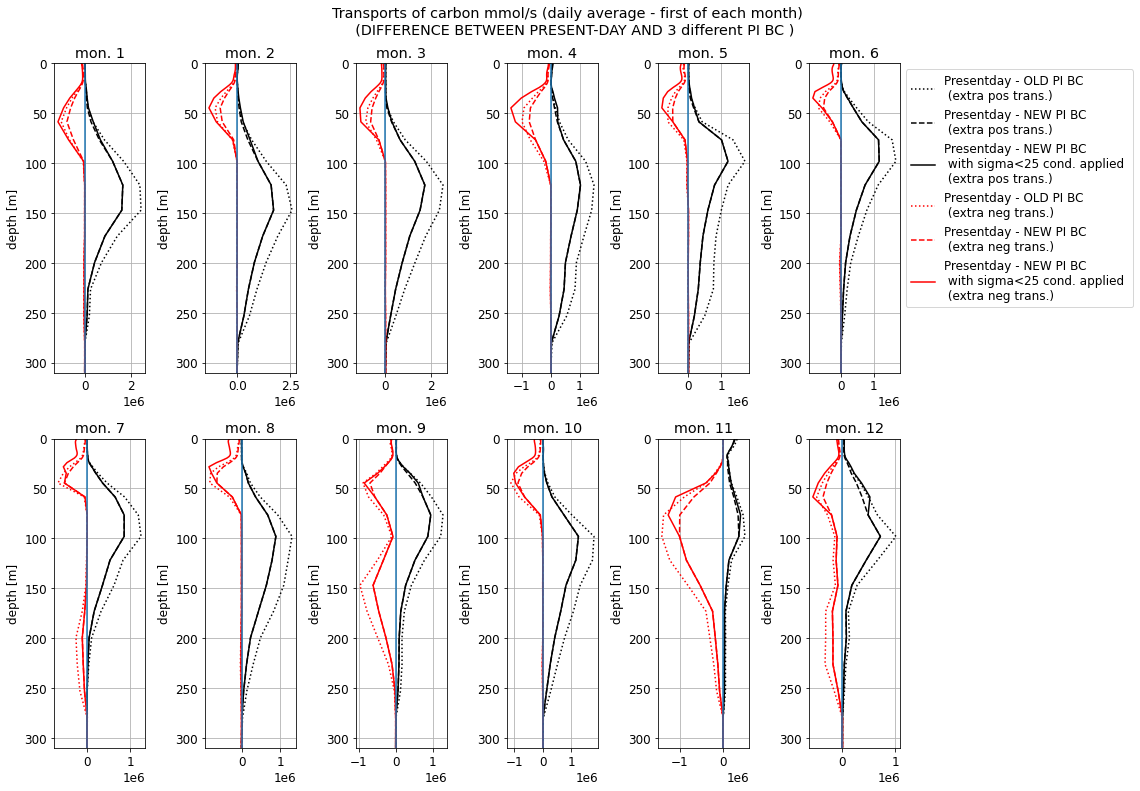

In [53]:
pos_transports_pi5 = np.copy(day1ofmonth_transports_PI5)
pos_transports_pi5[pos_transports_pi5<0] = 0
neg_transports_pi5 = np.copy(day1ofmonth_transports_PI5)
neg_transports_pi5[neg_transports_pi5>0] = 0

pos_present_day = present_day*pos_transports_pi5
pos_preind_old = preind_old*pos_transports_pi5
pos_preind_new = preind_new*pos_transports_pi5
pos_preind_new_25cutoff = preind_new_25cutoff*pos_transports_pi5

neg_present_day = present_day*neg_transports_pi5
neg_preind_old = preind_old*neg_transports_pi5
neg_preind_new = preind_new*neg_transports_pi5
neg_preind_new_25cutoff = preind_new_25cutoff*neg_transports_pi5


fig, axs = plt.subplots(2,6, figsize=(20*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,12):
    pt_present_day_pos = np.nansum(pos_present_day[i,:,:], axis =1)
    pt_preind_old_pos = np.nansum(pos_preind_old[i,:,:], axis =1)
    pt_preind_new_pos = np.nansum(pos_preind_new[i,:,:], axis =1)
    pt_preind_new_25cutoff_pos = np.nansum(pos_preind_new_25cutoff[i,:,:], axis =1)
    
    axs[i].plot(pt_present_day_pos-pt_preind_old_pos ,depths, color = 'k', \
                linestyle = ':', label = 'Presentday - OLD PI BC \n (extra pos trans.)')
    axs[i].plot(pt_present_day_pos-pt_preind_new_pos ,depths, color = 'k', \
                linestyle = '--', label = 'Presentday - NEW PI BC \n (extra pos trans.)')  
    axs[i].plot(pt_present_day_pos-pt_preind_new_25cutoff_pos ,depths, color = 'k', \
                linestyle = '-', label = 'Presentday - NEW PI BC \n with sigma<25 cond. applied \n (extra pos trans.)')  

    pt_present_day_neg = np.nansum(neg_present_day[i,:,:], axis =1)
    pt_preind_old_neg = np.nansum(neg_preind_old[i,:,:], axis =1)
    pt_preind_new_neg = np.nansum(neg_preind_new[i,:,:], axis =1)
    pt_preind_new_25cutoff_neg = np.nansum(neg_preind_new_25cutoff[i,:,:], axis =1)
    
    axs[i].plot(pt_present_day_neg-pt_preind_old_neg ,depths, color = 'r', \
                linestyle = ':', label = 'Presentday - OLD PI BC \n (extra neg trans.)')
    axs[i].plot(pt_present_day_neg-pt_preind_new_neg ,depths, color = 'r', \
                linestyle = '--', label = 'Presentday - NEW PI BC \n (extra neg trans.)')  
    axs[i].plot(pt_present_day_neg-pt_preind_new_25cutoff_neg ,depths, color = 'r', \
                linestyle = '-', label = 'Presentday - NEW PI BC \n with sigma<25 cond. applied \n (extra neg trans.)')  

#     axs[i].axvline(x=0)
#     trans_neg = np.nansum(neg_transports_pi5[i,:,:], axis =1)
#     axs[i].plot(trans_neg,depths, color = 'r', label = 'neg. transport')
#     axs[i].plot(trans_neg+trans_pos,depths, color = 'b', label = 'tot. transport')

    
for i in range(0,12):
    axs[i].grid();
    axs[i].set_ylim([0,310])
    axs[i].invert_yaxis()
    axs[i].set_title(f'mon. {i+1}')
    axs[i].axvline(x=0)
    axs[i].set_ylabel('depth [m]')
axs[5].legend(bbox_to_anchor = [1, 1])
    
plt.suptitle('Transports of carbon mmol/s (daily average - first of each month) \n  (DIFFERENCE BETWEEN PRESENT-DAY AND 3 different PI BC )')
plt.tight_layout()

/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


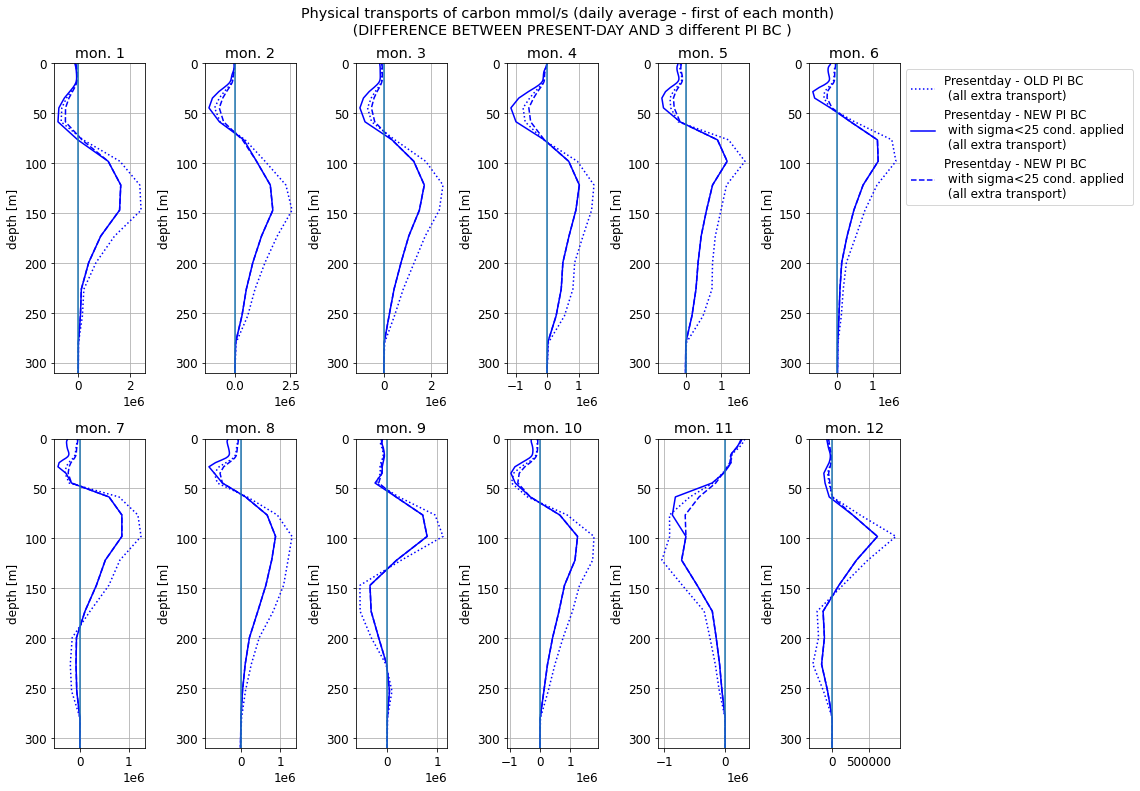

In [54]:
pos_transports_pi5 = np.copy(day1ofmonth_transports_PI5)
pos_transports_pi5[pos_transports_pi5<0] = 0
neg_transports_pi5 = np.copy(day1ofmonth_transports_PI5)
neg_transports_pi5[neg_transports_pi5>0] = 0

pos_present_day = present_day*pos_transports_pi5
pos_preind_old = preind_old*pos_transports_pi5
pos_preind_new = preind_new*pos_transports_pi5
pos_preind_new_25cutoff = preind_new_25cutoff*pos_transports_pi5

neg_present_day = present_day*neg_transports_pi5
neg_preind_old = preind_old*neg_transports_pi5
neg_preind_new = preind_new*neg_transports_pi5
neg_preind_new_25cutoff = preind_new_25cutoff*neg_transports_pi5


fig, axs = plt.subplots(2,6, figsize=(20*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,12):
    pt_present_day_pos = np.nansum(pos_present_day[i,:,:], axis =1)
    pt_preind_old_pos = np.nansum(pos_preind_old[i,:,:], axis =1)
    pt_preind_new_pos = np.nansum(pos_preind_new[i,:,:], axis =1)
    pt_preind_new_25cutoff_pos = np.nansum(pos_preind_new_25cutoff[i,:,:], axis =1)
    
#     axs[i].plot(pt_present_day_pos-pt_preind_old_pos ,depths, color = 'k', \
#                 linestyle = ':', label = 'Presentday - OLD PI BC \n (extra pos trans.)')
#     axs[i].plot(pt_present_day_pos-pt_preind_new_pos ,depths, color = 'k', \
#                 linestyle = '--', label = 'Presentday - NEW PI BC \n (extra pos trans.)')  
#     axs[i].plot(pt_present_day_pos-pt_preind_new_25cutoff_pos ,depths, color = 'k', \
#                 linestyle = '-', label = 'Presentday - NEW PI BC \n with sigma<25 cond. applied \n (extra pos trans.)')  

    pt_present_day_neg = np.nansum(neg_present_day[i,:,:], axis =1)
    pt_preind_old_neg = np.nansum(neg_preind_old[i,:,:], axis =1)
    pt_preind_new_neg = np.nansum(neg_preind_new[i,:,:], axis =1)
    pt_preind_new_25cutoff_neg = np.nansum(neg_preind_new_25cutoff[i,:,:], axis =1)
    
    axs[i].plot((pt_present_day_neg-pt_preind_old_neg) + (pt_present_day_pos-pt_preind_old_pos), \
                depths, color = 'b', \
                linestyle = ':', label = 'Presentday - OLD PI BC \n (all extra transport)')
    axs[i].plot((pt_present_day_neg-pt_preind_new_25cutoff_neg) + (pt_present_day_pos-pt_preind_new_25cutoff_pos), \
                depths, color = 'b', \
                linestyle = '-', label = 'Presentday - NEW PI BC \n with sigma<25 cond. applied \n (all extra transport)')
    axs[i].plot((pt_present_day_neg-pt_preind_new_neg) + (pt_present_day_pos-pt_preind_new_pos), \
                depths, color = 'b', \
                linestyle = '--', label = 'Presentday - NEW PI BC \n with sigma<25 cond. applied \n (all extra transport)')
    


    
for i in range(0,12):
    axs[i].grid();
    axs[i].set_ylim([0,310])
    axs[i].invert_yaxis()
    axs[i].set_title(f'mon. {i+1}')
    axs[i].axvline(x=0)
    axs[i].set_ylabel('depth [m]')
    
axs[5].legend(bbox_to_anchor = [1, 1])
    
plt.suptitle('Physical transports of carbon mmol/s (daily average - first of each month) \n (DIFFERENCE BETWEEN PRESENT-DAY AND 3 different PI BC )')
plt.tight_layout()